<a href="https://colab.research.google.com/github/officialamit558/BHP-Prediction/blob/main/DogvsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:04<00:00, 240MB/s]
100% 1.06G/1.06G [00:04<00:00, 260MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# Use Generator provided by keras

In [5]:
# generators
# This is for the trainning dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# This is for the test the datasets
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
 #Apply the Normlization

In [7]:

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# Create the CNN Model

In [9]:
model = Sequential()

In [18]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
history= model.fit(train_ds , epochs=10 , validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3381 - accuracy: 0.8525 - val_loss: 0.5917 - val_accuracy: 0.7304
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2710 - accuracy: 0.8867 - val_loss: 0.5540 - val_accuracy: 0.7670
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1985 - accuracy: 0.9194 - val_loss: 0.4998 - val_accuracy: 0.8190
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1362 - accuracy: 0.9467 - val_loss: 0.8458 - val_accuracy: 0.6260
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.1115 - accuracy: 0.9582 - val_loss: 0.5902 - val_accuracy: 0.8120
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.0740 - accuracy: 0.9735 - val_loss: 1.2817 - val_accuracy: 0.7542
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0671 - accuracy: 0.9784 - val_loss: 0.7235 - val_ac

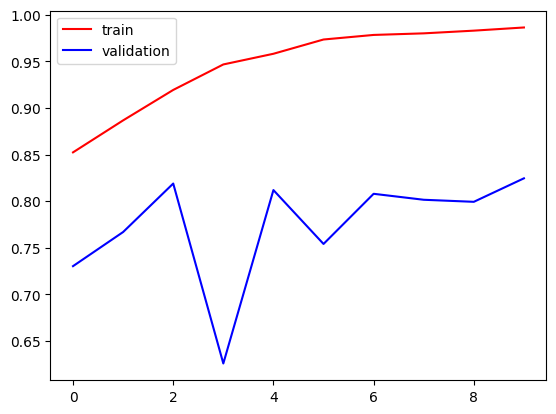

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

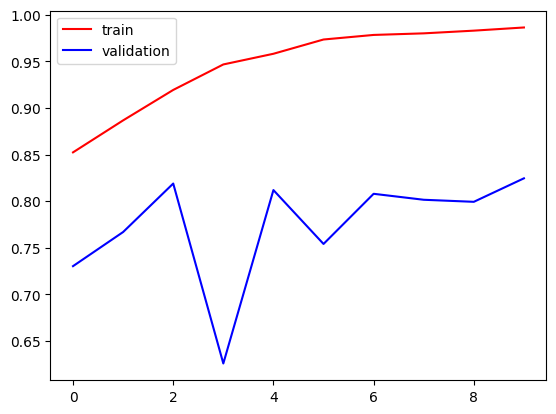

In [47]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

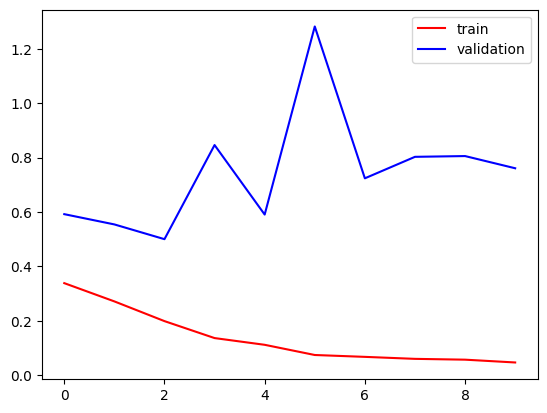

In [48]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

In [28]:
test_img_cat = cv2.imread('/content/cat.jpeg')

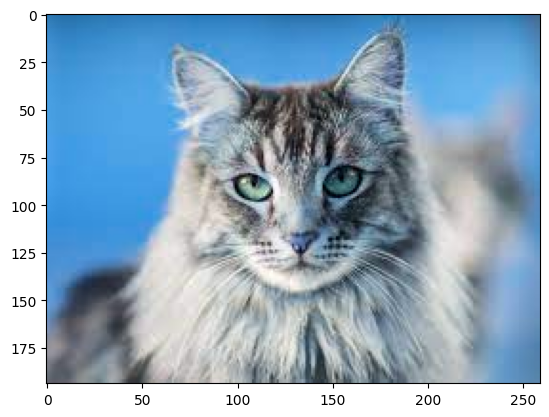

In [29]:
plt.imshow(test_img_cat)

In [30]:
test_img_cat.shape

(194, 259, 3)

In [ ]:
#test_img_cat.shape

In [37]:
test_img_cat = cv2.resize(test_img_cat,(256,256))

In [39]:
test_input = test_img_cat.reshape((1,256,256,3))

In [49]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [31]:
test_img_dog = cv2.imread('/content/dog.jpeg')

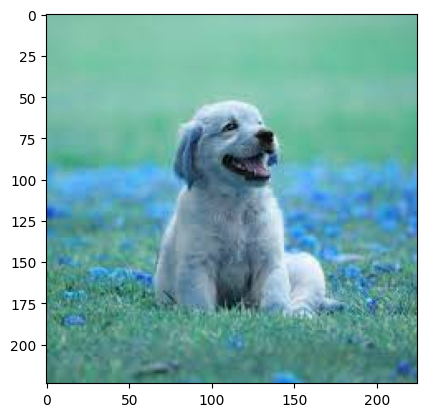

In [34]:
plt.imshow(test_img_dog)

In [35]:
test_img_dog.shape

(224, 225, 3)

In [42]:
test_img_dog = cv2.resize(test_img_dog,(256,256))



In [43]:
test_input_dog = test_img_dog.reshape(1,256,256,3)

In [50]:
model.predict(test_input_dog)

1/1 [==============================] - 0s 27ms/step


array([[1.]], dtype=float32)

In [52]:
dog_blur = cv2.imread('/content/dogblur.jpeg')

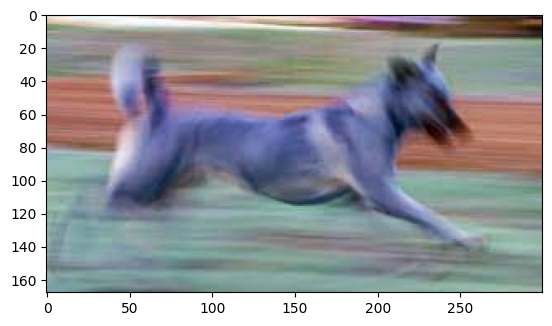

In [53]:
plt.imshow(dog_blur)

In [54]:
dog_blur.shape


(168, 300, 3)

In [55]:
dog_blur = cv2.resize(dog_blur , (256,256))

input_target = dog_blur.reshape(1,256,256,3)

In [56]:
model.predict(input_target)

1/1 [==============================] - 0s 27ms/step


array([[1.]], dtype=float32)

In [51]:
#Save the model

In [57]:
model.save("path_to_save_model")